In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy import constants

Traceback (most recent call last):
  File "c:\Users\zem04\.vscode\extensions\ms-python.python-2024.22.2-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'numpy'



$\frac{d^{2}\theta}{dt^{2}} = -\frac{g}{l}sin(\theta)$

In [130]:
def RK_4M(t1, x0, k, l, h):
    """
    ODE Solver for ODEs of the form dx/dt = v, dv/dt = -(k/l)*sin(x)
    using Runge-Kutta 4th order Method.

    Args:
        t1: Time to solve the equation up to
        x0: Initial position at t = 0
        k: Spring constant or equivalent parameter
        l: Length of pendulum or equivalent parameter
        h: Step size of the method

    Returns:
        t: Array of time points
        x: Array of position values at each time point
        v: Array of velocity values at each time point
        E: Array of energy values at each time point
    """
    # Initialize arrays
    t = np.arange(0, t1 + h, h)
    n = len(t)
    x = np.zeros(n)
    v = np.zeros(n)
    E = np.zeros(n)

    # Set initial conditions
    x[0] = x0
    v[0] = v0
    E[0] = 0.5 * k * x[0]**2 + 0.5 * l * v[0]**2

    # Main RK4 loop
    for i in range(1, n):
        # Compute RK4 steps for position
        k1_x = h * v[i-1]
        k2_x = h * (v[i-1] + 0.5 * k1_x)
        k3_x = h * (v[i-1] + 0.5 * k2_x)
        k4_x = h * (v[i-1] + k3_x)

        x[i] = x[i-1] + (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
        #x[i] = np.fmod(x[i], 2 * np.pi)
      
        # Compute RK4 steps for velocity
        k1_v = h * (-k / l) * np.sin(x[i-1])
        k2_v = h * (-k / l) * np.sin(x[i-1] + 0.5 * k1_x)
        k3_v = h * (-k / l) * np.sin(x[i-1] + 0.5 * k2_x)
        k4_v = h * (-k / l) * np.sin(x[i-1] + k3_x)

        # Update position and velocity
        v[i] = v[i-1] + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
        #x[i] = np.fmod(x[i], 2 * np.pi)
      
        # Compute energy
        E[i] = 0.5 * k * np.sin(x[i])**2 + 0.5 * l * v[i]**2
    x = np.fmod(x+np.pi, 2*np.pi)-np.pi
      
    return t, x, v, E


In [141]:
t,x,v,E=RK_4M(t1=10,x0=0.3*np.pi,k=sp.constants.g,l=0.7,h=.0001)

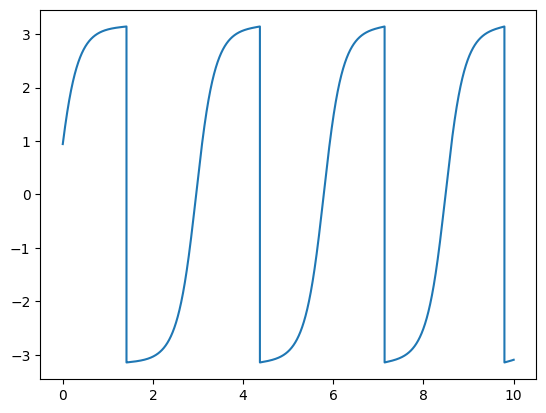

In [142]:
plt.plot(t,x)
plt.show()

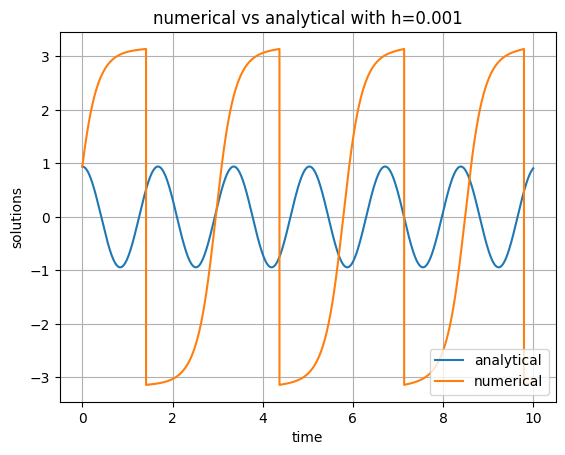

In [143]:
def an1(t):
    return (0.3*np.pi*np.cos(np.sqrt(sp.constants.g/0.7)*t))
plt.plot(t,an1(t),label='analytical')
plt.plot(t,x,label='numerical')
plt.legend()
plt.grid(True)
plt.xlabel("time")
plt.ylabel("solutions")
plt.title("numerical vs analytical with h=0.001")
plt.show()

In [121]:
x[-1]

2.924892725619742

In [122]:
v0=np.sqrt(2 * sp.constants.g * 0.7*(1+np.cos(0.3*np.pi)))/0.7
v0

6.669944151489036

In [470]:
def RK_4M_smallx(t1, x0,k,l, h):
    """ODE Solver for ODEs of the form dx/dt = (k/l)*x using Runge-Kutta 4th order Method. 
    Assumes that the initial condition is given at t = 0 
       
    Args: 
        t1: time to solve the equation up to
        x0: starting value of x, at t = 0
        k:  value of k in the ODE equation
        l: length of pendulum
        h:  step size of the method 
        
    Returns:
        t: An array in increments of h for the dimension of time up to t1
        x: An array for the position coordinate at each timepoint
    """
    
    #Initialise the arrays to be used
    # t is an array containing each of the timepoints that we will step forward to
    t = np.arange(0,t1+h,h)
    # n is the number of timesteps in t
    n = np.shape(t)[0]
    # x starts as an empty array, but we will fill in the values we calculate in the loop, below
    x = np.zeros(n) 
    v = np.zeros(n)
    E = np.zeros(n)
    
    #Set the initial value of x (i.e. x[0])
    x[0] = x0
    v[0]= 0
    E[0]=  0.5 * k * x[0]**2 + 0.5 * l * v[0]**2
    
    #Loop over the time values and calculate the derivative
    for i in range(1,n): 

        #position
        #k1 value
        k1=h*v[i-1]
        #x midpoint
        x_m = (v[i-1] + (1/2)*k1)
        #k2 value
        k2=h*(x_m)
        #k3 value
        k3=(h*v[i-1] + (h/2)*k2) 
        #k4 value
        k4=(h*v[i-1] + (h)*k3)
        
        #x value
        x[i] = x[i-1] + (1/6)*k1 + (1/3)* k2 + (1/3) * k3 + (1/6) * k4

        #velocity
        #k1 value
        k1=h*(-k/l)*x[i-1]
        #k2 value
        k2=h*((-k/l)*x[i-1] + (1/2)*k1)
        #k3 value
        k3=(h*(-k/l)*x[i-1] + (h/2)*k2) 
        #k4 value
        k4=(h*(-k/l)*x[i-1] + (h)*k3)
        
        #v value
        v[i] = v[i-1] + (1/6)*k1 + (1/3)* k2 + (1/3) * k3 + (1/6) * k4 

         # Calculate energy at this step
        E[i] = 0.5 * k * x[i-1]**2 + 0.5 * l * v[i-1]**2
    
    
    return(t,x,v,E) 

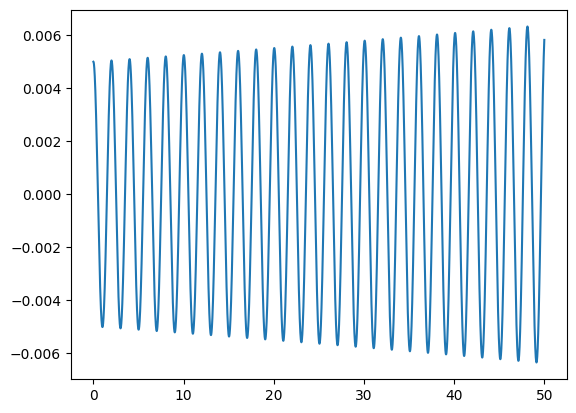

In [468]:
t,x,v,E=RK_4M_smallx(t1=50,x0=0.005,k=sp.constants.g,l=1,h=.001)
plt.plot(t,x)
plt.show()

In [622]:
def rk4(y, t, dt, derivs):
    k1 = dt * derivs(t, y)
    k2 = dt * derivs(t + dt / 2, y + k1 / 2)
    k3 = dt * derivs(t + dt / 2, y + k2 / 2)
    k4 = dt * derivs(t + dt, y + k3)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y_next